In [113]:
from transformers import pipeline
from datasets import load_dataset
from evaluate import evaluator
import evaluate
from transformers import AutoTokenizer, T5ForConditionalGeneration
import torch
from evaluate import visualization


In [101]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [62]:

data = load_dataset("navjordj/SNL_summarization", split="test").shuffle().select(range(10))
metric = evaluate.load("rouge")


Extracting data files: 100%|██████████| 3/3 [00:00<00:00, 1208.50it/s]


Dataset parquet downloaded and prepared to /home/navjordj/.cache/huggingface/datasets/navjordj___parquet/navjordj--SNL_summarization-fbb45ae9a461b172/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec. Subsequent calls will reuse this data.


In [63]:
model = T5ForConditionalGeneration.from_pretrained("navjordj/snl-summarization")
tokenizer = AutoTokenizer.from_pretrained("navjordj/snl-summarization")

In [88]:
gen_config = {
    "max_length": 60,
    "num_beams": 2,
}

In [102]:
pipe = pipeline(
    "summarization", model=model, tokenizer=tokenizer, device=device, **gen_config
)


In [86]:
pipe(data[0]["article"])

[{'summary_text': 'Beksøm er en søm som syes direkte til binnsålen ved hjelp av tråder i lærskanten. Slike tråder trekkes tvers igjennom lærskanten og trekkes tvers igjennom lærskanten'}]

In [103]:
task_evaluator = evaluator("summarization")
results = task_evaluator.compute(
    model_or_pipeline=pipe,
    data=data,
    input_column="article",
    label_column="ingress",
    metric=metric
)

In [104]:
print(results)

{'rouge1': 0.25190458299012086, 'rouge2': 0.08724046835172639, 'rougeL': 0.20049636847612634, 'rougeLsum': 0.19877966103652736, 'total_time_in_seconds': 16.81702615100221, 'samples_per_second': 0.5946354551755305, 'latency_in_seconds': 1.6817026151002212}


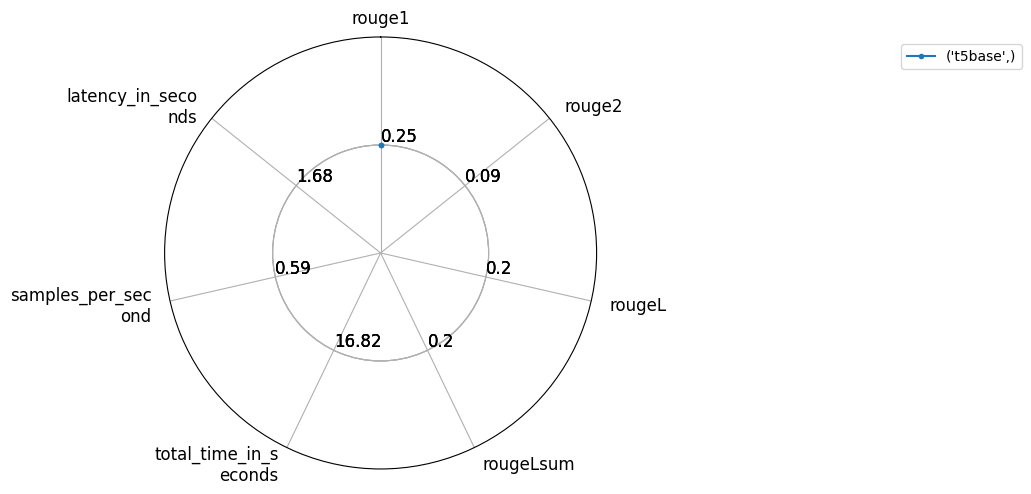

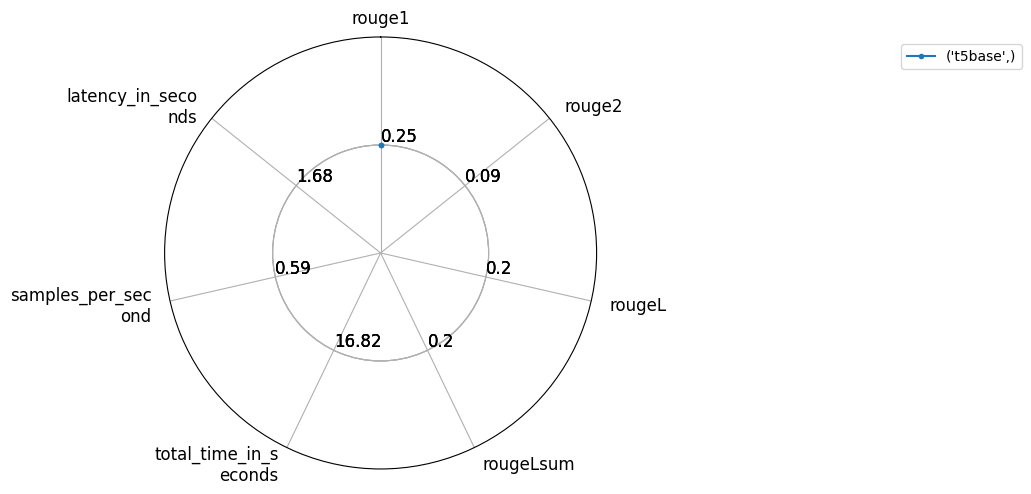

In [122]:
visualization.radar_plot([results], model_names=["t5base"])